**NAME:** SOMTO A.
<br>**ID:** 801215537
<br>**HW#:** 0
<br>**GITHUB:** *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*

##  PROBLEM 1:  <br>
            Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero). Finally discuss your results.

### Problem 1 Pseudocode:  
<br>-import necessary libraries
<br>-load D3.csv dataset 
<br>-create a cost function
<br>-create gradient descent function
<br>-call gradient descent function three time(x1,x2,x3) to get values for theta and cost history in relation to each explanatory variable
<br>-plot a linear regression fit graph with training data (x and y variables), and linear regresion(x, x.theta). Do three times for x1, x2 and x3.
<br>-plot a convergence of gradient descent graph with cost history. Do three times for x1, x2 and x3
<br>-test result with a random variable of x. Do three times for x1, x2 and x3

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------

**-FIRST step is to import the necessary libraries**
<br><br> >*numpy* is used for array and matrics manipulation.
<br> >*pandas* is used for data manipulation and analysis.
<br> >*matplotlib* is used for data visualisation

In [2]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-SECOND step, load dataset D3.csv into variable 'dataset'**
<br><br> >This dataset was provided by this HW. It contains 4 columns, the first 3 columns are explanatory variables x1, x2, x3; and the final/fourth column is the dependent variable y. It has 100 training examples per column.

In [3]:
dataset = pd.read_csv('D3.csv')
dataset.head() # To get first n rows from the dataset default value of n is 5

,x1,x2,x3,y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [5]:
X_1 = dataset.values[:, 0]  # get input values from first column
X_2 = dataset.values[:, 1]  # get input values from first column
X_3 = dataset.values[:, 2]  # get input values from first column
y = dataset.values[:, 3]  # get output values from second column
m = len(y) # Number of training examples
y

array([ 4.38754501,  2.6796499 ,  2.96848981,  3.25406475,  3.53637472,
        3.81541972,  4.09119974,  2.36371479,  3.83296487,  4.09894997,
        4.3616701 ,  4.62112526,  4.87731544,  3.13024065,  3.37990089,
        3.62629616,  3.86942645,  5.30929177,  5.54589212,  3.77922749,
        4.00929789,  4.23610332,  4.45964378,  4.67991926,  2.89692977,
        3.1106753 ,  4.52115587,  4.72837146,  4.93232207,  5.13300772,
        3.33042839,  3.52458409,  3.71547481,  3.90310057,  4.08746135,
        5.46855715,  3.64638799,  3.82095385,  3.99225473,  4.16029065,
        4.32506159,  4.48656756,  2.64480856,  2.79978458,  4.15149563,
        4.29994171,  4.44512281,  2.58703894,  2.7256901 ,  2.86107628,
        2.9931975 ,  3.12205373,  3.247645  ,  2.56997129,  2.68903261,
        2.80482896,  2.91736034,  3.02662674,  3.13262817,  1.23536462,
        1.3348361 ,  1.43104261,  2.72398415,  2.81366071,  2.9000723 ,
        0.98321892,  1.06310057,  1.13971724,  1.21306894,  1.28

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA\nred is x1 | yellow is x2 | blue is x3')

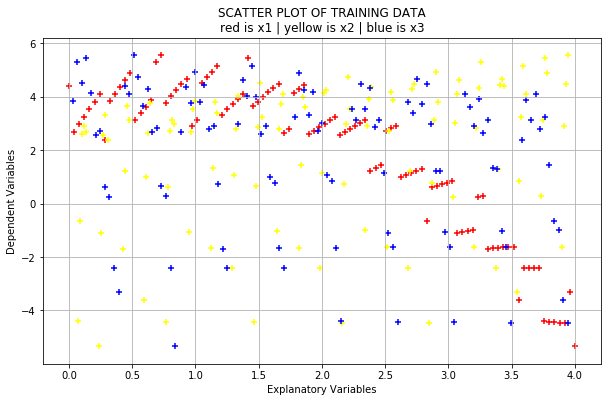

In [56]:
plt.scatter(X_1,y, color='red',marker= '+')
plt.scatter(X_2,y, color='yellow',marker= '+')
plt.scatter(X_3,y, color='blue',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA\nred is x1 | yellow is x2 | blue is x3')

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-THIRD step, create a cost function**
<br><br> > The hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1
<br> > Matrix operations are much faster than loops operations, so matrice of x, θ and (x * θ) were used.
<br>

In [57]:
#Lets create a matrix with single column of ones
X_0 = np.ones((m, 1))

# Using reshape function convert Xs 1D array to 2D array of dimension 97x1
X_1 = X_1.reshape(m, 1)
X_2 = X_2.reshape(m, 1)
X_3 = X_3.reshape(m, 1)

In [58]:
# Lets use hstack() function from numpy to stack X_0 and X_1,X_2 and X_3 horizontally (i.e. column wise) to make a single 2D array. 
# This will be our final X matrix (feature matrix)
x_1 = np.hstack((X_0, X_1))
x_2 = np.hstack((X_0, X_2))
x_3 = np.hstack((X_0, X_3))

In [59]:
#Initialise theta to zero as recommended by the hw question
theta = np.zeros(2)

**Explanation of *compute-cost* function for linear regression**.
<br>**Input Parameters**
<br> *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
<br> *'m' :* number of training examples
<br> *'n' :* number of features (including X_0 column of ones)
<br> *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br><br>**Output Parameters**
<br> *'J' :* Scalar value.
<br><br>**Library Functions Used**
<br> *numpy.dot()* returns the product of two arrays.
<br> *numpy.subtract()* performs vector entree subtraction
<br> *numpy.square()* performs the vector entree square

In [60]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-FOURTH step, create a *gradient_descent* function**
<br><br> > Uses for loop to compute theta using batch gradient descent algorithm.
<br> > Each value theta value is used to compute cost.Result is stored in a list.
<br> > Cost should decrease with every iteration.
<br> > Returns new theta and cost history variable

**Explanation of *gradient_descent* function for linear regression**.
<br>**Input Parameters**
<br> *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
<br> *'m' :* number of training examples
<br> *'n' :* number of features (including X_0 column of ones)
<br> *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br> *'alpha' :* Learning rate. Scalar value
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br> *'iterations':* No of iterations. Scalar value. 
<br><br>**Output Parameters**
<br> *'theta' :*  Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
<br> *'cost_history' :* Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)

<br><br>**Library Functions Used**
<br> *numpy.dot()* returns the product of two arrays
<br> *numpy.subtract()* performs vector entree subtraction
<br> *numpy.transpose()* reverse or permute the axes of an array


In [61]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [62]:
# declare and assign values to the gradient descent learning parameters alpha and no of iterations
theta = [0., 0.];
#iterations = 800;
#alpha = 0.04;
iterations = 1000;
alpha = 0.01;

<br><br> 
### QUESTION1

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-FIFTH step, call *gradient_descent* function for all Xs value**
<br><br> > *gradient_descent* function returns optimal theta and cost history.
<br> > values are printed to screen

<br><br> **For x1**

In [63]:
thetaOfX1, cost_historyOfX1 = gradient_descent(x_1, y, theta, alpha, iterations)
print('\n\n\nFinal value of theta with x1 =', thetaOfX1)
print('First 5 values from cost_history =', cost_historyOfX1[:5])
print('Last 5 values from cost_history =', cost_historyOfX1[-5 :])




Final value of theta with x1 = [ 5.29294728 -1.79119079]
First 5 values from cost_history = [5.48226715 5.44290965 5.40604087 5.37137434 5.33865767]
Last 5 values from cost_history = [1.03735718 1.03712537 1.03689459 1.03666482 1.03643608]


<br><br> **For x2**

In [64]:
thetaOfX2, cost_historyOfX2 = gradient_descent(x_2, y, theta, alpha, iterations)
print('\n\n\nFinal value of theta with x2 =', thetaOfX2)
print('First 5 values from cost_history =', cost_historyOfX2[:5])
print('Last 5 values from cost_history =', cost_historyOfX2[-5 :])




Final value of theta with x2 = [0.68701995 0.57669462]
First 5 values from cost_history = [5.29831663 5.09909109 4.92356115 4.76890697 4.63264432]
Last 5 values from cost_history = [3.59967832 3.59967694 3.59967556 3.59967419 3.59967283]


<br><br> **For x3**

In [65]:
thetaOfX3, cost_historyOfX3 = gradient_descent(x_3, y, theta, alpha, iterations)
print('\n\n\nFinal value of theta with x3 =', thetaOfX3)
print('First 5 values from cost_history =', cost_historyOfX3[:5])
print('Last 5 values from cost_history =', cost_historyOfX3[-5 :])




Final value of theta with x3 = [ 2.59118664 -0.40965135]
First 5 values from cost_history = [5.40768785 5.30397076 5.21178297 5.12979411 5.05682752]
Last 5 values from cost_history = [3.6398457  3.63979902 3.63975254 3.63970627 3.63966021]


<br><br> 
### QUESTION2

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

**-SIXTH step, plot the *Linear Regression Fit* for all Xs**
<br><br> > The gradient descent function returns the optimal value of theta, this should give us the best fit line
<br> > The green line is plotted using predicted values

<br><br> **For x1**

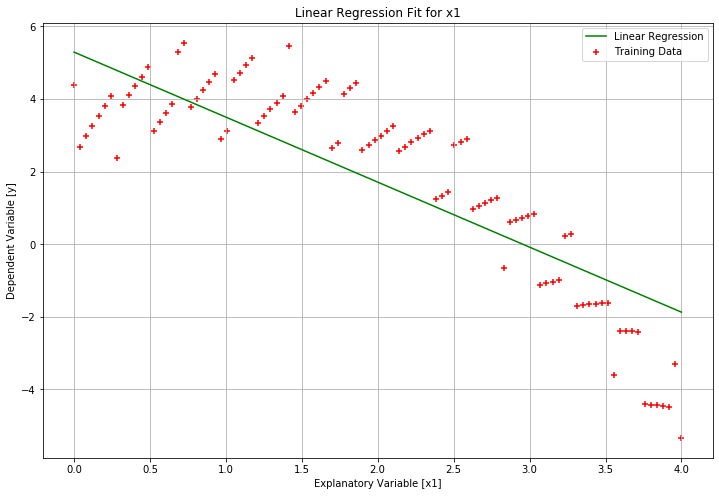

In [66]:
# Since X1 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(x_1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x_1[:,1],x_1.dot(thetaOfX1), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable [x1]')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for x1')
plt.legend()

<br><br> **For x2**

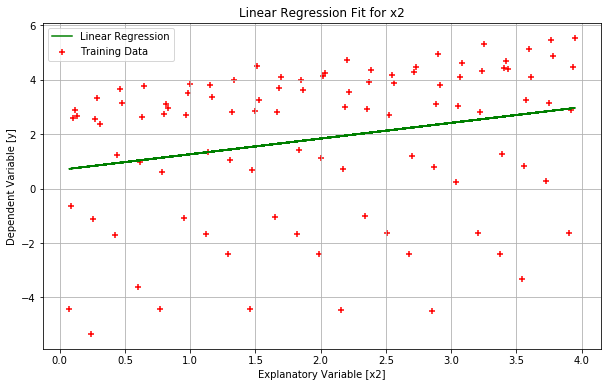

In [67]:
# Since X2 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(x_2[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x_2[:,1],x_2.dot(thetaOfX2), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable [x2]')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for x2')
plt.legend()

<br><br> **For x3**

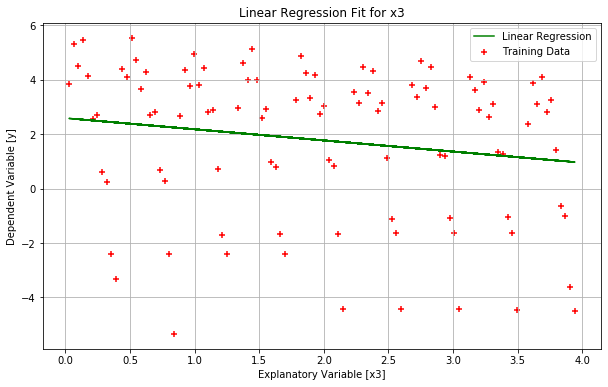

In [68]:
# Since X3 is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(x_3[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x_3[:,1],x_3.dot(thetaOfX3), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Explanatory Variable [x3]')
plt.ylabel('Dependent Variable [y]')
plt.title('Linear Regression Fit for x3')
plt.legend()


<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br>

#### -SEVENTH step , plot the *Convergence of gradient descent for cost history* for all Xs**
<br><br> > cost_history contains the values of cost for every iteration performed during batch gradient descent
<br> > Values of cost against no of iterations to visualize the performance of the Gradient Descent Algorithm is plotted

<br><br> **For x1**

Text(0.5, 1.0, 'Convergence of gradient descent for cost history of x1')

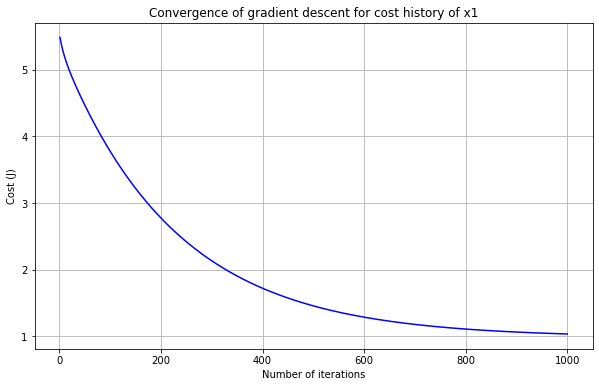

In [69]:
plt.plot(range(1, iterations + 1),cost_historyOfX1, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for cost history of x1')

<br><br> **For x2**

Text(0.5, 1.0, 'Convergence of gradient descent for cost history of x2')

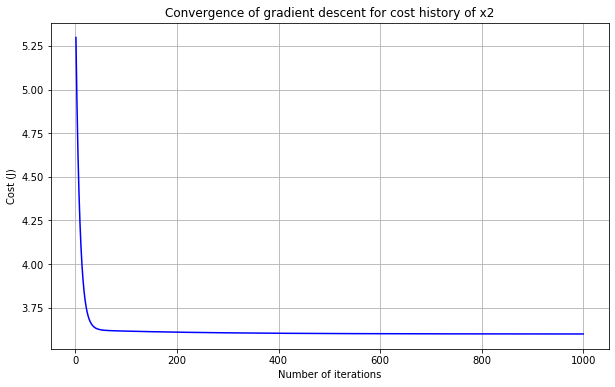

In [70]:
plt.plot(range(1, iterations + 1),cost_historyOfX2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for cost history of x2')

<br><br> **For x3**

Text(0.5, 1.0, 'Convergence of gradient descent for cost history of x3')

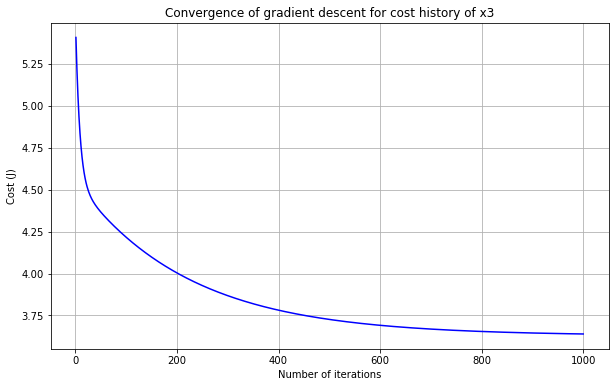

In [71]:
plt.plot(range(1, iterations + 1),cost_historyOfX3, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for cost history of x3')

<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

####  -EIGHTH step, test the linear model with a arbitrary value of x.
<br><br> **Using theta of x1**

In [72]:
predictTest = np.array([1, 0.5]).dot(thetaOfX1)
print("Using theta derived from the gradient decent function with input x1,we can predict for a arbitratry variable of x = 0.5, our prediction of y is ", predictTest)

Using theta derived from the gradient decent function with input x1,we can predict for a arbitratry variable of x = 0.5, our prediction of y is  4.397351887745785


<br><br> **Using theta of x2**

In [73]:
predictTest = np.array([1, 0.5]).dot(thetaOfX2)
print("Using theta derived from the gradient decent function with input x2,we can predict for a arbitratry variable of x = 0.5, our prediction of y is ", predictTest)

Using theta derived from the gradient decent function with input x2,we can predict for a arbitratry variable of x = 0.5, our prediction of y is  0.9753672579275247


<br><br> **Using theta of x3**

In [74]:
predictTest = np.array([1, 0.5]).dot(thetaOfX3)
print("Using theta derived from the gradient decent function with input x3,we can predict for an arbitratry variable of x = 0.5, our prediction of y is ", predictTest)

Using theta derived from the gradient decent function with input x3,we can predict for an arbitratry variable of x = 0.5, our prediction of y is  2.3863609643654233


<br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>
--------------------------------------------------------------------------------------------------------------------------------------
<br><br>

## OBSERVATIONS
<br><br> 
#### QUESTIONS 3 & 4
<br>**Cost** for all three explanatory variables are:
<br>        cost for x1 = 0.98499591
<br>        cost for x2 = 3.59967283
<br>        cost for x3 = 3.63966021
<br> **x1** has the lowest cost.

<br><br>For the experiment i had a fixed number of iterations(1000) and i settled for a fixed learning rate of 0.01. i noticed  that with the increse of the learning rate, the steeper the curve in Convergence graph and the higher the learning rate the shallower the curve

